In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model = hub.load('https://kaggle.com/models/google/bird-vocalization-classifier/frameworks/tensorFlow2/variations/bird-vocalization-classifier/versions/1')

In [9]:
tf.saved_model.save(model, '/content/drive/MyDrive/207-Project/models/bird-vocalization-classifier')

In [10]:
model2 = hub.load('/content/drive/MyDrive/207-Project/models/bird-vocalization-classifier')

# Pre-trained model test with all-zero waveform

In [11]:
waveform = np.zeros(shape=(1,160000), dtype=np.float32)

In [12]:
logits, embeddings = model.infer_tf(waveform)

In [13]:
logits

<tf.Tensor: shape=(1, 10932), dtype=float32, numpy=
array([[-12.127439,  -9.230714, -13.064908, ..., -11.938248, -11.955139,
        -10.859409]], dtype=float32)>

In [14]:
embeddings

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[ 0.17013709,  0.1446399 ,  0.01418491, ...,  0.37167782,
        -0.05038951,  0.05635666]], dtype=float32)>

In [15]:
logits, embeddings = model2.infer_tf(waveform)

In [16]:
logits

<tf.Tensor: shape=(1, 10932), dtype=float32, numpy=
array([[-12.127439,  -9.230714, -13.064908, ..., -11.938248, -11.955139,
        -10.859409]], dtype=float32)>

In [17]:
embeddings

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[ 0.17013709,  0.1446399 ,  0.01418491, ...,  0.37167782,
        -0.05038951,  0.05635666]], dtype=float32)>

In [ ]:
embeddings_pd = pd.Series(embeddings.numpy().squeeze())
embeddings_pd

0       0.170137
1       0.144639
2       0.014186
3      -0.150861
4      -0.180136
          ...   
1275    0.315455
1276    0.019785
1277    0.371679
1278   -0.050389
1279    0.056358
Length: 1280, dtype: float32

In [ ]:
embeddings_pd.describe()

count    1280.000000
mean        0.029211
std         0.126154
min        -0.241974
25%        -0.056989
50%         0.008289
75%         0.102419
max         0.848608
dtype: float64

<Axes: >

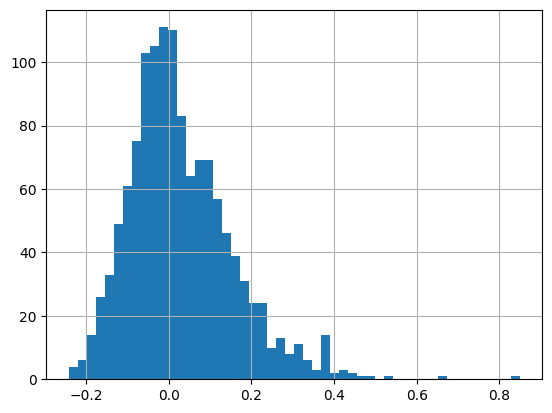

In [ ]:
embeddings_pd.hist(bins=50)

# EDA of sample birdclef audio file

In [5]:
audio_file_path = '/content/drive/MyDrive/207-Project/BirdCLEF/train_audio/abethr1/XC128013.ogg'
birdsong_test, _ = librosa.load(audio_file_path, sr=32000, dtype=np.float32)

In [6]:
Audio(birdsong_test, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

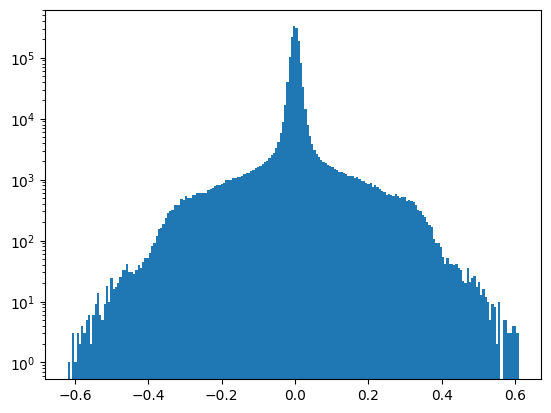

In [20]:
plt.hist(birdsong_test, bins=200, log=True)
plt.show()

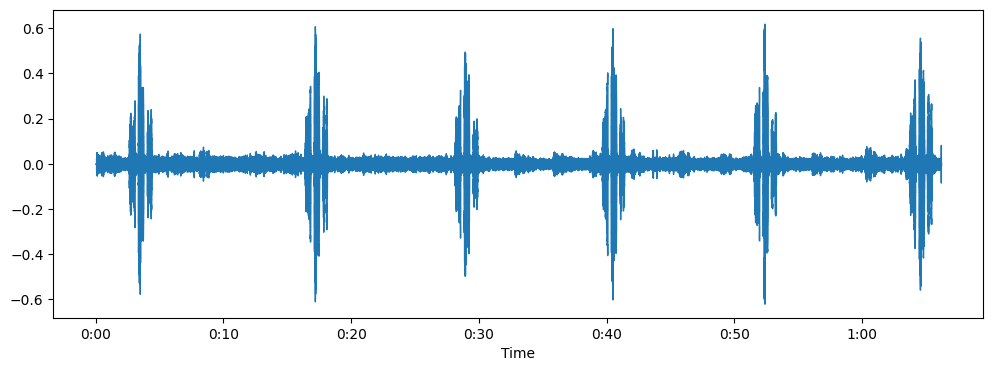

In [21]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test)

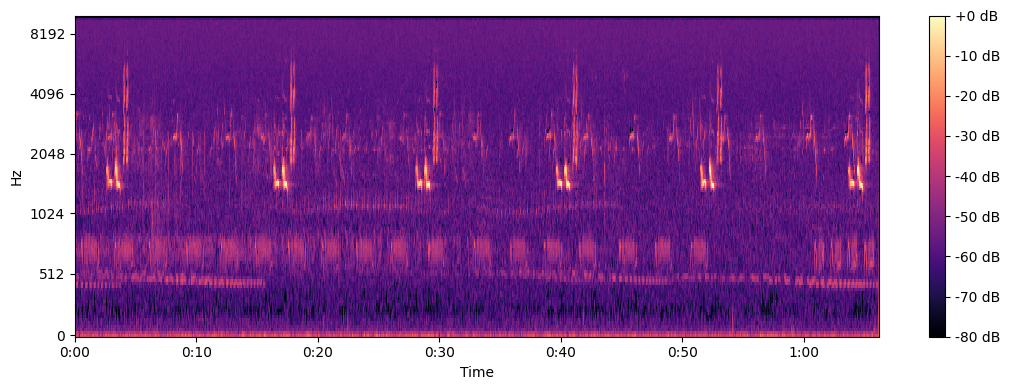

In [7]:
def plot_mel_spectrogram(audio, sample_rate=32000):
  S = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
  plt.figure(figsize=(11, 4))
  librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=10000, x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.tight_layout()

plot_mel_spectrogram(birdsong_test)

In [ ]:
def rms_norm(audio, db_level=-27):
  r = 10 ** (db_level / 20)
  scale = np.sqrt((len(audio) * (r**2)) / np.sum(audio**2))
  return scale * audio

# Data processing and augmentation tests

In [23]:
birdsong_test_pn = librosa.util.normalize(birdsong_test)

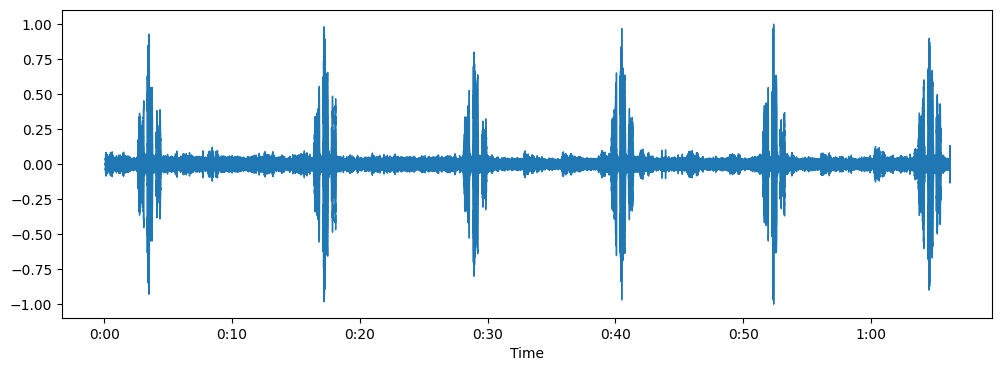

In [24]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_pn)

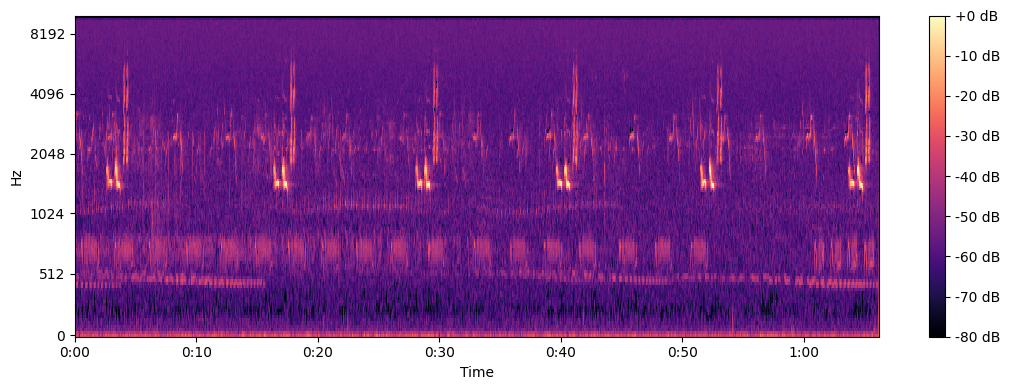

In [72]:
plot_mel_spectrogram(birdsong_test_pn)

In [25]:
Audio(birdsong_test_pn, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

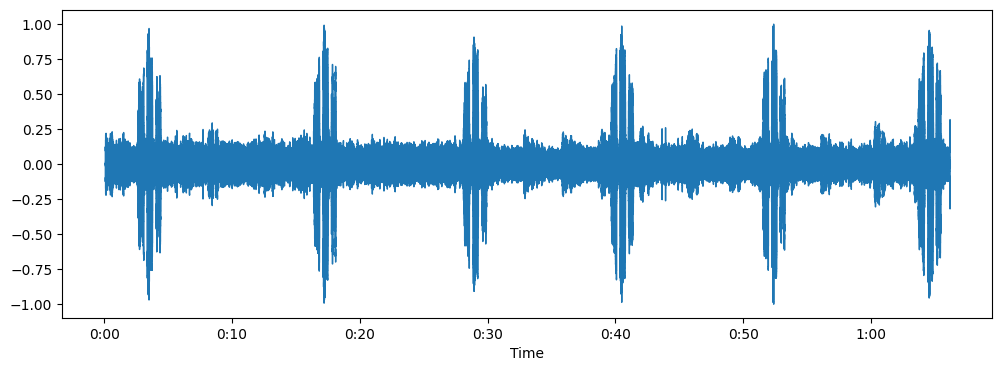

In [26]:
birdsong_test_compressed = librosa.mu_compress(birdsong_test_pn, mu=7, quantize=False)
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_compressed)

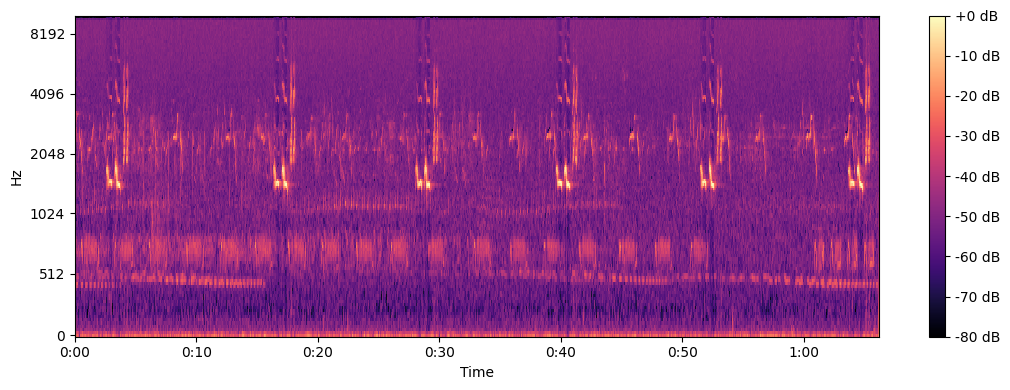

In [73]:
plot_mel_spectrogram(birdsong_test_compressed)

In [27]:
Audio(birdsong_test_compressed, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

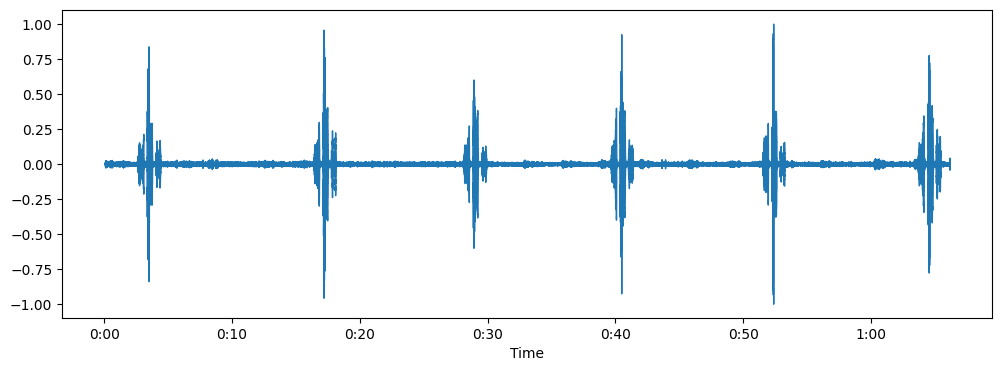

In [28]:
birdsong_test_expanded = librosa.mu_expand(birdsong_test_pn, mu=8, quantize=False)
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_expanded)

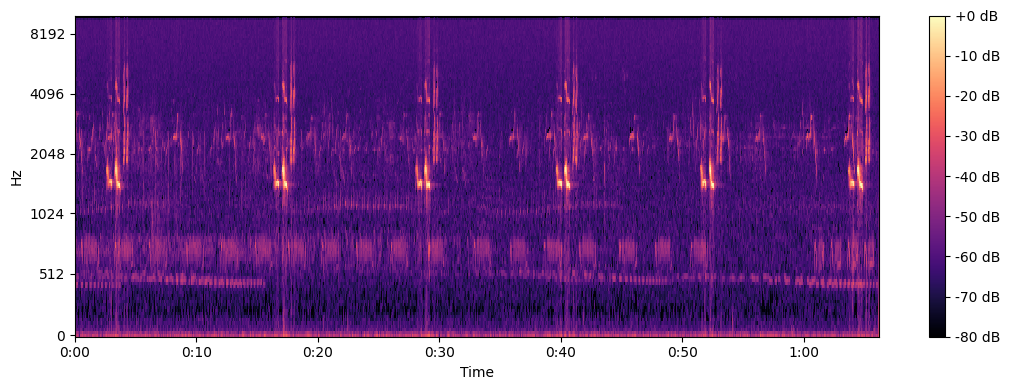

In [74]:
plot_mel_spectrogram(birdsong_test_expanded)

In [29]:
Audio(birdsong_test_expanded, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

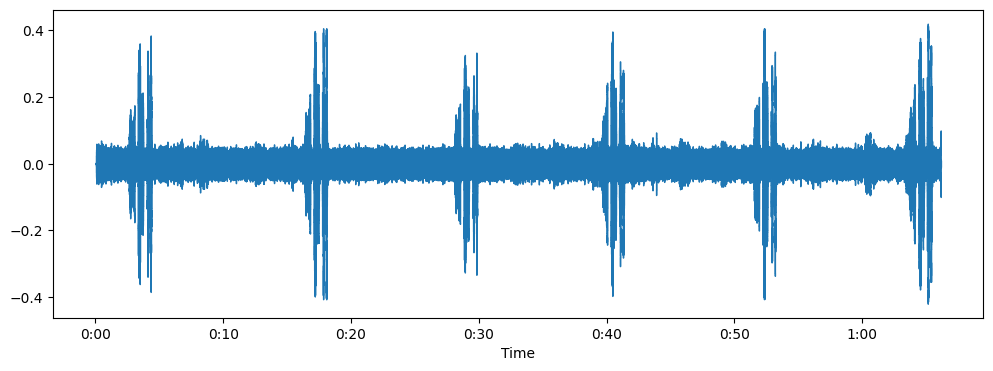

In [30]:
birdsong_test_preemphasis = librosa.effects.preemphasis(birdsong_test_pn, coef=1)
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_preemphasis)

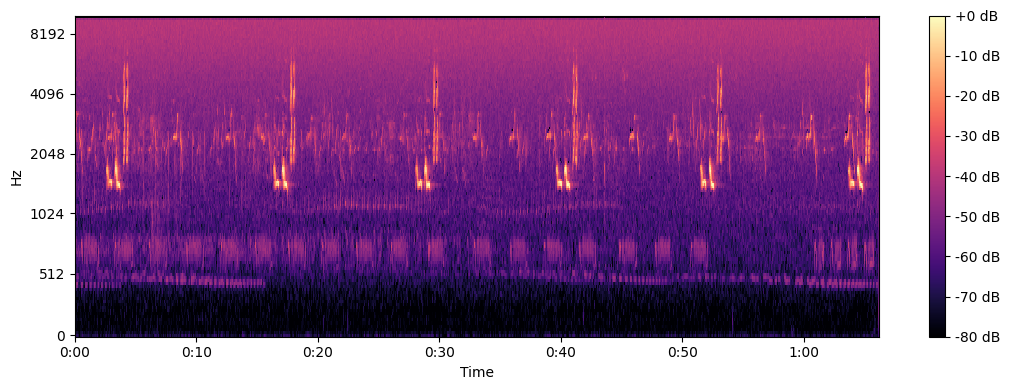

In [75]:
plot_mel_spectrogram(birdsong_test_preemphasis)

In [31]:
Audio(birdsong_test_preemphasis, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

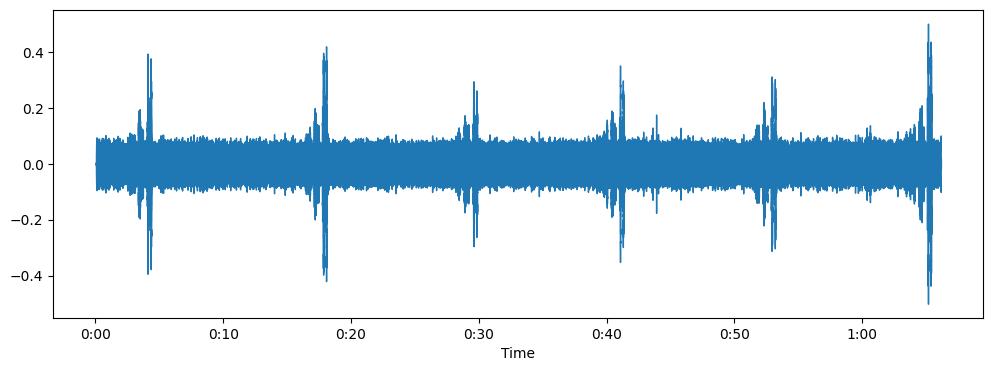

In [32]:
birdsong_test_preemphasis2 = librosa.effects.preemphasis(birdsong_test_preemphasis, coef=1)
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_preemphasis2)

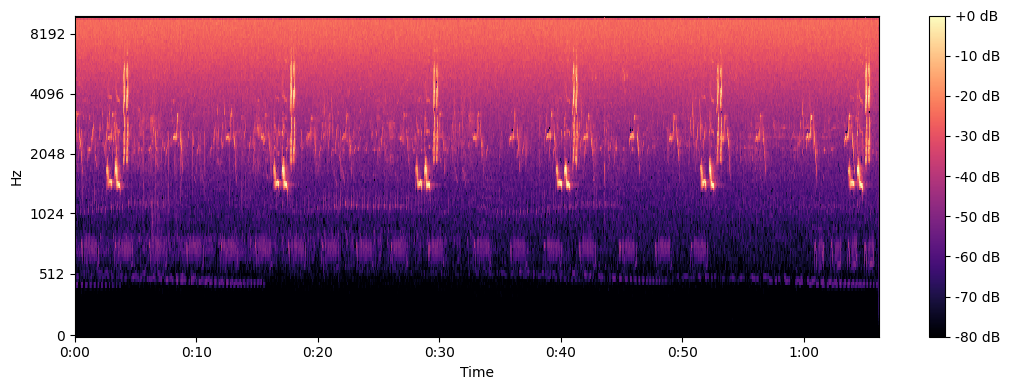

In [76]:
plot_mel_spectrogram(birdsong_test_preemphasis2)

In [33]:
Audio(birdsong_test_preemphasis2, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

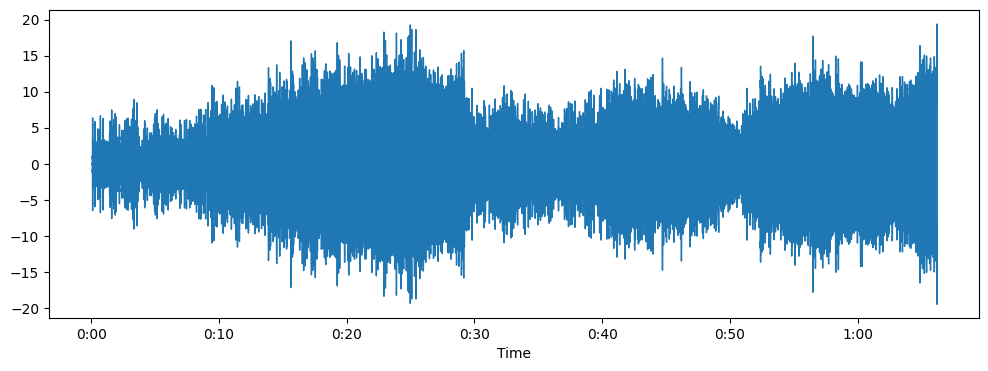

In [34]:
birdsong_test_deemphasis = librosa.effects.deemphasis(birdsong_test_pn, coef=1)
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_deemphasis)

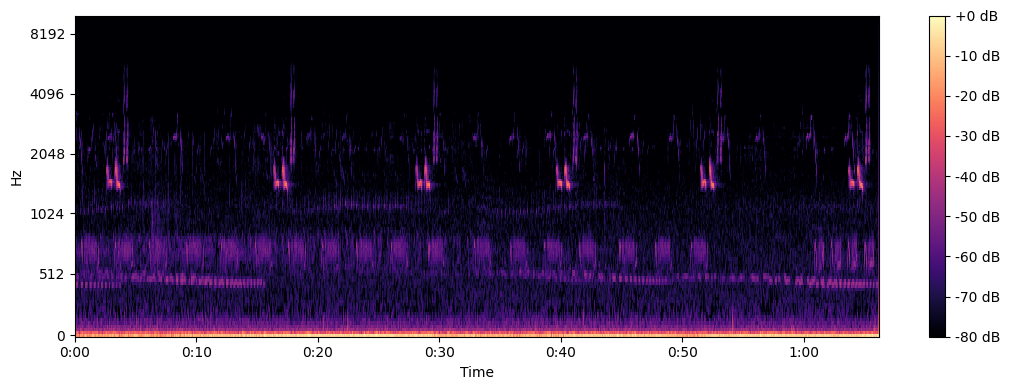

In [77]:
plot_mel_spectrogram(birdsong_test_deemphasis)

In [35]:
Audio(birdsong_test_deemphasis, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

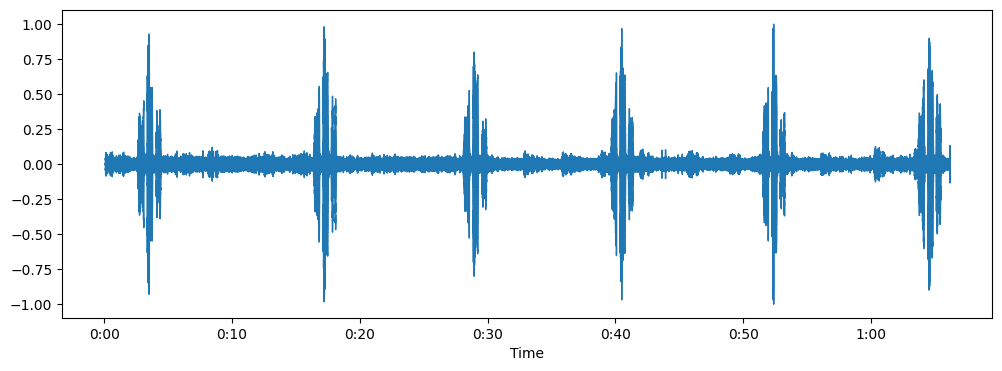

In [79]:
birdsong_test_de_to_pre = librosa.effects.preemphasis(birdsong_test_deemphasis, coef=1)
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_de_to_pre)

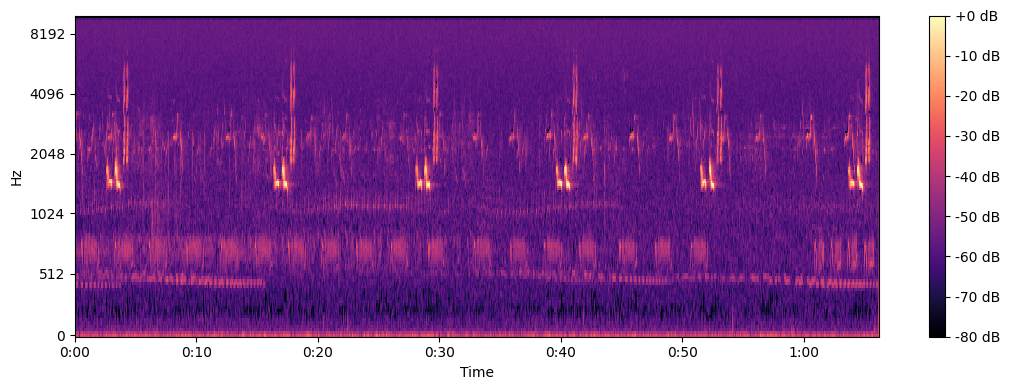

In [80]:
plot_mel_spectrogram(birdsong_test_de_to_pre)

In [37]:
Audio(birdsong_test_de_to_pre, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

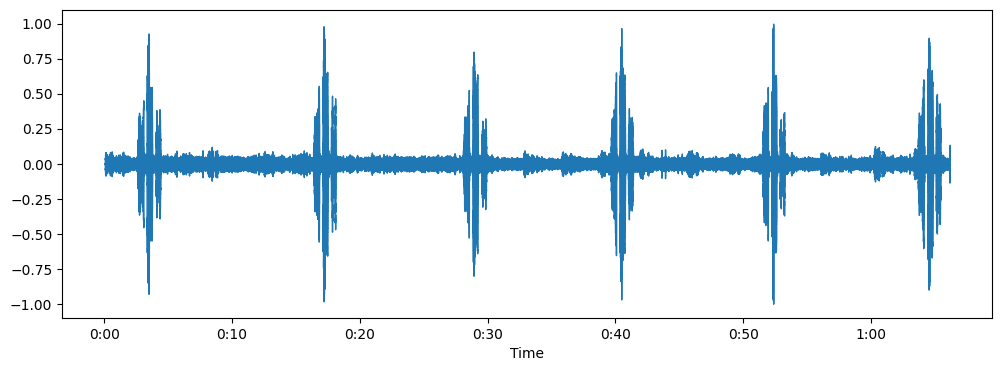

In [81]:
birdsong_test_pre_to_de = librosa.effects.deemphasis(birdsong_test_preemphasis, coef=1)
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_pre_to_de)

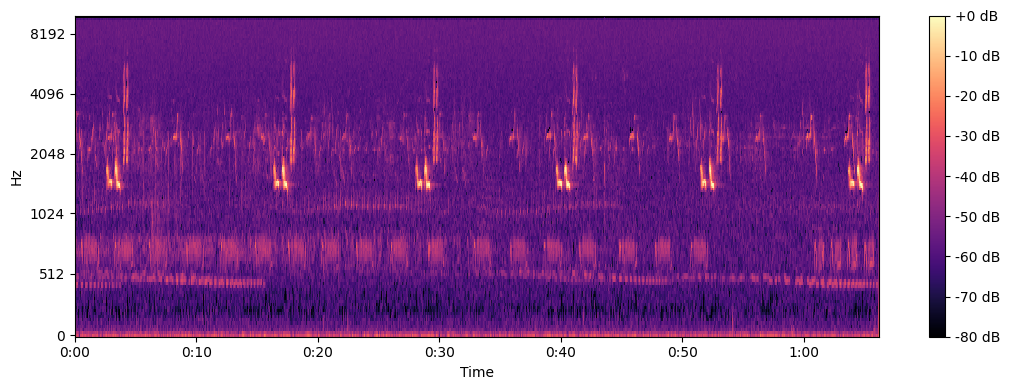

In [82]:
plot_mel_spectrogram(birdsong_test_pre_to_de)

In [39]:
Audio(birdsong_test_pre_to_de, rate=32000)

Output hidden; open in https://colab.research.google.com to view.

# Pre-trained model test with birdclef audio file + augmentation

In [10]:
birdsong_test_5sec = birdsong_test[:32000*5]
logits_5sec, embeddings_5sec = model.infer_tf(birdsong_test_5sec.reshape([1,-1]))

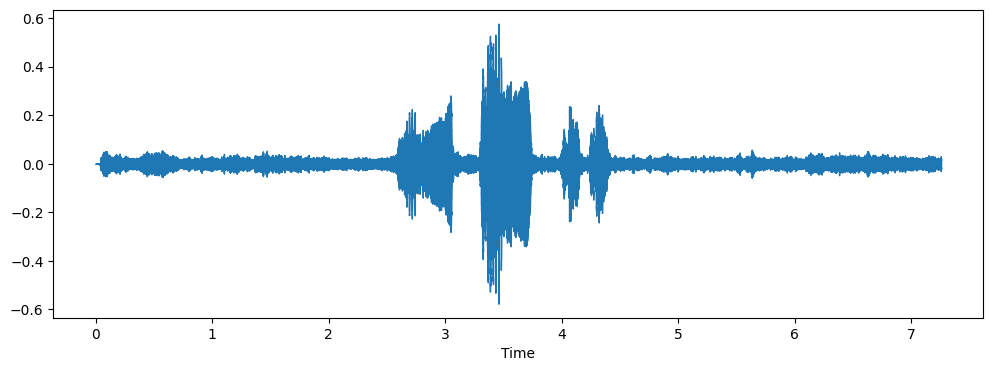

In [11]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_5sec)

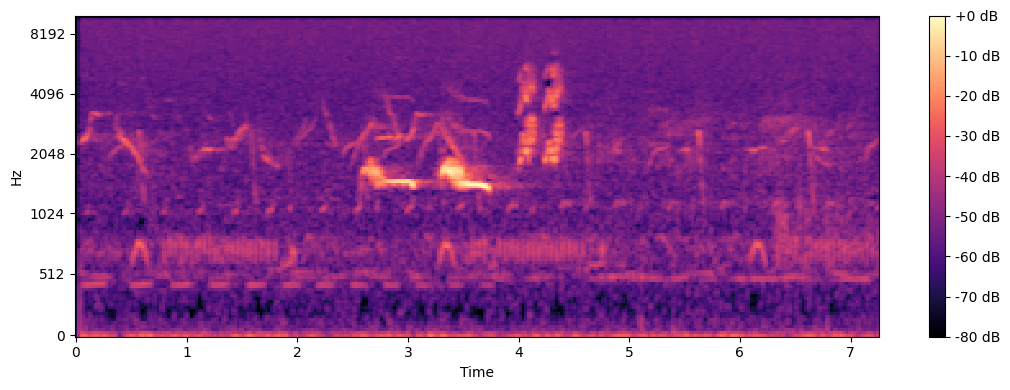

In [12]:
plot_mel_spectrogram(birdsong_test_5sec)

In [28]:
Audio(birdsong_test_5sec, rate=32000)

In [54]:
birdsong_test_5sec_aug = (
    librosa.mu_expand(librosa.util.normalize(birdsong_test_5sec), mu=15, quantize=False)
  + 0.0 * np.random.uniform(low=-1, high=1, size=32000*5)
  + 0.005 * np.random.randn(32000*5)
  + 0.3 * np.clip(0.000025 * np.random.standard_cauchy(size=32000*5), -1, 1)
  + 0.00 * (librosa.tone(440, sr=32000, length=32000*5))
)
logits_5sec_aug, embeddings_5sec_aug = model.infer_tf(birdsong_test_5sec_aug.reshape([1,-1]))

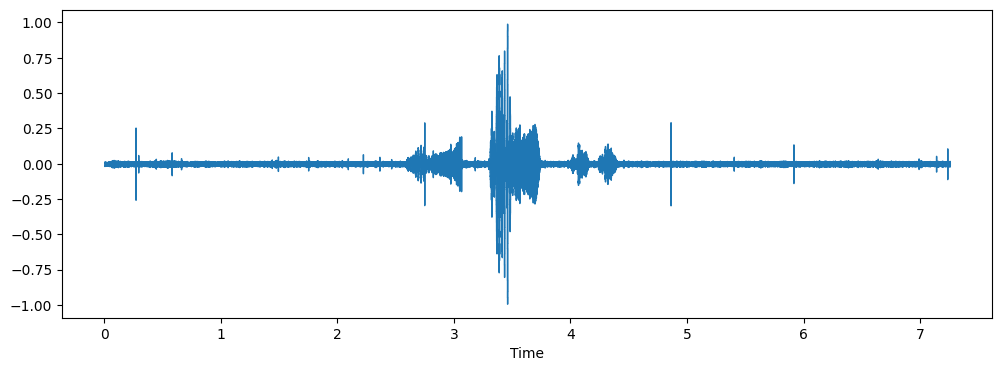

In [55]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test_5sec_aug)

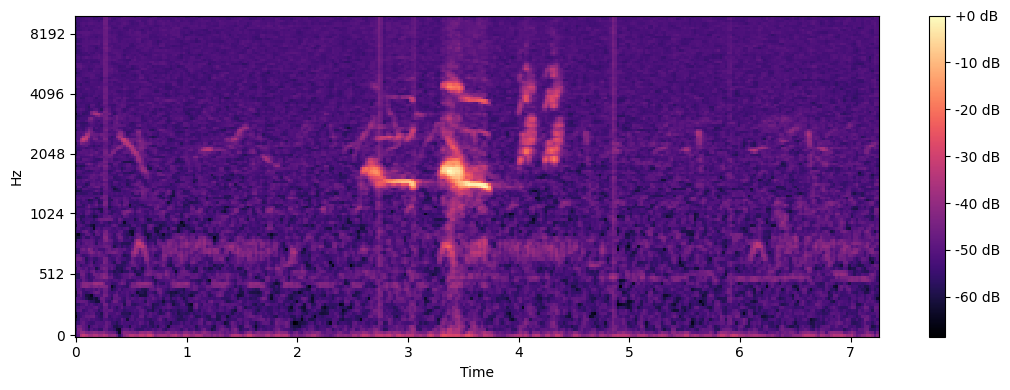

In [56]:
plot_mel_spectrogram(birdsong_test_5sec_aug)

In [57]:
Audio(birdsong_test_5sec_aug, rate=32000)

<Axes: >

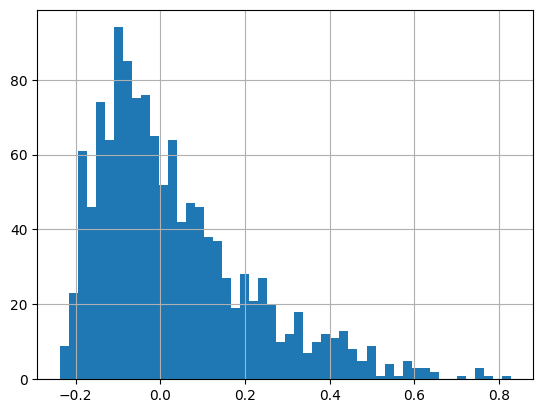

In [51]:
pd.Series(embeddings_5sec.numpy().squeeze()).hist(bins=50)

<Axes: >

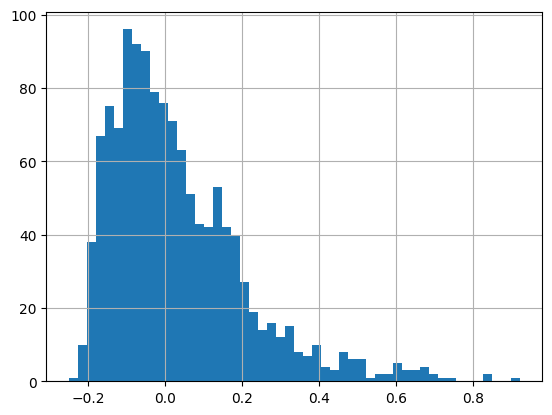

In [52]:
pd.Series(embeddings_5sec_aug.numpy().squeeze()).hist(bins=50)

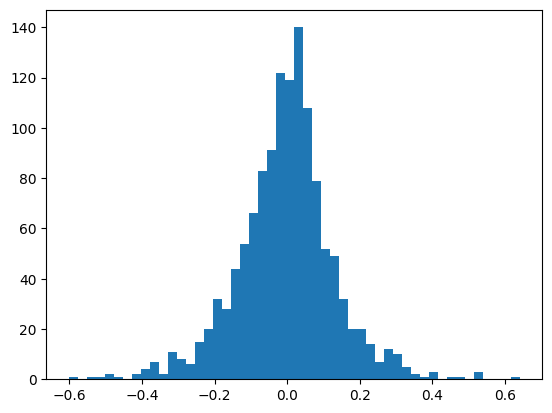

In [53]:
plt.hist((embeddings_5sec_aug - embeddings_5sec).numpy().squeeze(), bins=50)
plt.show()

In [ ]:
birdsong_test2, _ = librosa.load(
    '/content/drive/MyDrive/207-Project/BirdCLEF/train_audio/darter3/XC153877.ogg'
    , sr=32000
    , dtype=np.float32
)

In [ ]:
birdsong_test2_5sec = birdsong_test2[:32000*5]
logits_5sec_2, embeddings_5sec_2 = model.infer_tf(birdsong_test2_5sec.reshape([1,-1]))

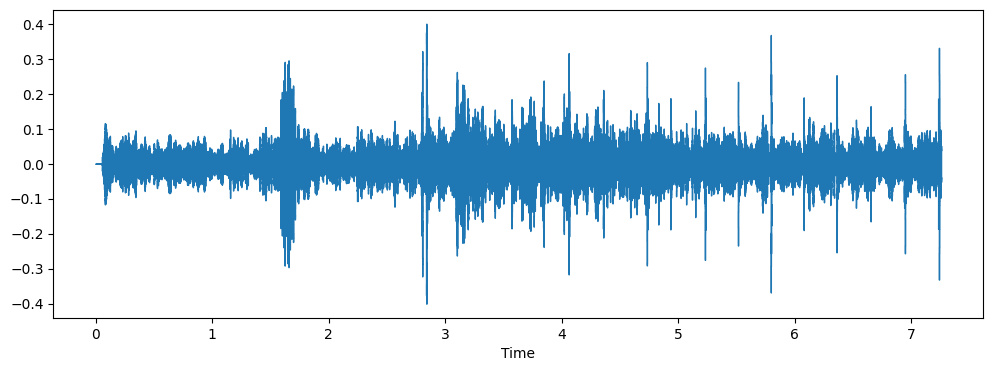

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(birdsong_test2_5sec)

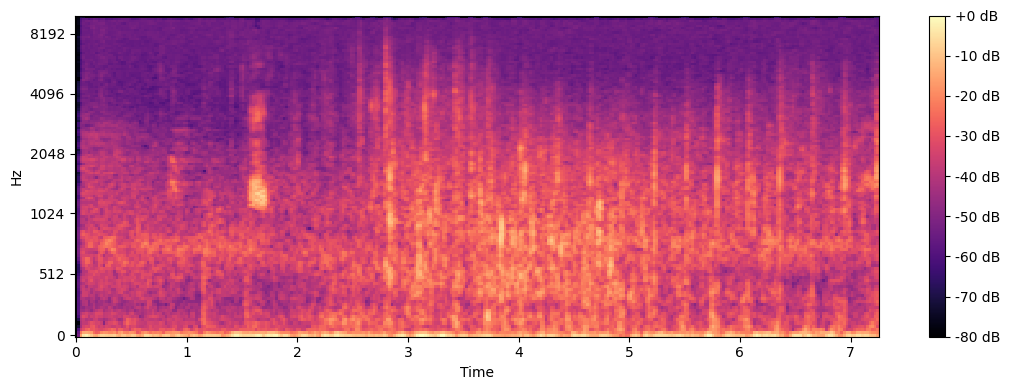

In [ ]:
plot_mel_spectrogram(birdsong_test2_5sec)

In [ ]:
Audio(birdsong_test2_5sec, rate=32000)

<Axes: >

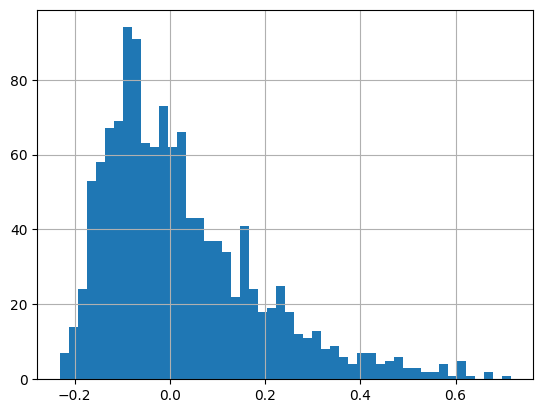

In [ ]:
pd.Series(embeddings_5sec_2.numpy().squeeze()).hist(bins=50)

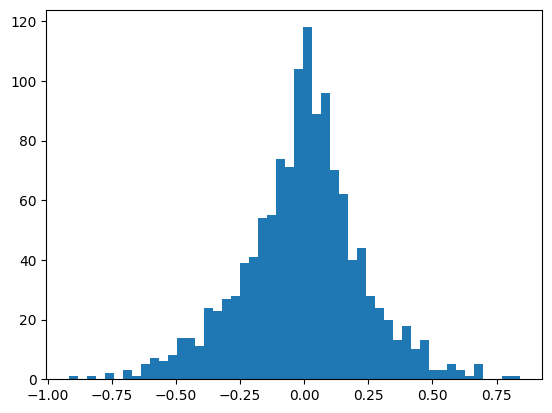

In [ ]:
plt.hist((embeddings_5sec_2 - embeddings_5sec).numpy().squeeze(), bins=50)
plt.show()